In [ ]:
import requests
import pandas as pd
import numpy as np

In [ ]:
url = 'https://fantasy.premierleague.com/api/bootstrap-static/'
r = requests.get(url)
json = r.json()

In [ ]:
json.keys()

dict_keys(['events', 'game_settings', 'phases', 'teams', 'total_players', 'elements', 'element_stats', 'element_types'])

In [ ]:
elements_df = pd.DataFrame(json['elements'])
elements_types_df = pd.DataFrame(json['element_types'])
teams_df = pd.DataFrame(json['teams'])

In [ ]:
elements_df.head()

,chance_of_playing_next_round,chance_of_playing_this_round,code,cost_change_event,cost_change_event_fall,cost_change_start,cost_change_start_fall,dreamteam_count,element_type,ep_next,ep_this,event_points,first_name,form,id,in_dreamteam,news,news_added,now_cost,photo,points_per_game,second_name,selected_by_percent,special,squad_number,status,team,team_code,total_points,transfers_in,transfers_in_event,transfers_out,transfers_out_event,value_form,value_season,web_name,minutes,goals_scored,assists,clean_sheets,goals_conceded,own_goals,penalties_saved,penalties_missed,yellow_cards,red_cards,saves,bonus,bps,influence,creativity,threat,ict_index,influence_rank,influence_rank_type,creativity_rank,creativity_rank_type,threat_rank,threat_rank_type,ict_index_rank,ict_index_rank_type,corners_and_indirect_freekicks_order,corners_and_indirect_freekicks_text,direct_freekicks_order,direct_freekicks_text,penalties_order,penalties_text
0,NaN,None,80201,0,0,0,0,0,1,3.5,None,0,Bernd,0.0,1,False,,None,50,80201.jpg,3.7,Leno,2.3,False,None,a,1,3,131,0,0,0,0,0.0,26.2,Leno,3131,0,0,11,37,1,1,0,0,1,86,11,625,702.2,0.0,2.0,70.3,42,12,437,47,328,4,198,13,NaN,,NaN,,NaN,
1,NaN,None,115918,0,0,0,0,0,1,2.0,None,0,Rúnar Alex,0.0,2,False,,None,40,115918.jpg,1.0,Rúnarsson,1.2,False,None,a,1,3,1,0,0,0,0,0.0,0.2,Rúnarsson,15,0,0,0,0,0,0,0,0,0,2,0,8,16.6,0.0,0.0,1.7,352,31,348,17,341,13,358,32,NaN,,NaN,,NaN,
2,NaN,None,47431,0,0,0,0,0,3,3.2,None,0,Willian,0.0,3,False,,None,65,47431.jpg,3.1,Borges Da Silva,0.3,False,None,a,1,3,78,0,0,0,0,0.0,12.0,Willian,1398,1,7,3,17,0,0,0,0,0,0,9,306,256.2,534.8,228.0,102.3,224,96,49,36,146,85,124,71,1.0,,2.0,,NaN,
3,NaN,None,54694,0,0,0,0,0,4,4.2,None,0,Pierre-Emerick,0.0,4,False,,None,100,54694.jpg,4.5,Aubameyang,4.0,False,None,a,1,3,131,0,0,0,0,0.0,13.1,Aubameyang,2330,10,3,10,26,1,0,0,2,0,0,11,358,493.8,361.5,823.0,167.4,125,18,90,12,32,16,50,18,NaN,,NaN,,1.0,
4,NaN,None,58822,0,0,0,0,0,2,2.7,None,0,Cédric,0.0,5,False,,None,45,58822.jpg,2.8,Soares,0.3,False,None,a,1,3,28,0,0,0,0,0.0,6.2,Cédric,744,0,1,2,11,0,0,0,1,0,0,3,125,110.8,114.8,66.0,29.2,299,110,209,52,265,87,295,101,NaN,,5.0,,NaN,


In [ ]:
elements_df.columns

Index(['chance_of_playing_next_round', 'chance_of_playing_this_round', 'code',
       'cost_change_event', 'cost_change_event_fall', 'cost_change_start',
       'cost_change_start_fall', 'dreamteam_count', 'element_type', 'ep_next',
       'ep_this', 'event_points', 'first_name', 'form', 'id', 'in_dreamteam',
       'news', 'news_added', 'now_cost', 'photo', 'points_per_game',
       'second_name', 'selected_by_percent', 'special', 'squad_number',
       'status', 'team', 'team_code', 'total_points', 'transfers_in',
       'transfers_in_event', 'transfers_out', 'transfers_out_event',
       'value_form', 'value_season', 'web_name', 'minutes', 'goals_scored',
       'assists', 'clean_sheets', 'goals_conceded', 'own_goals',
       'penalties_saved', 'penalties_missed', 'yellow_cards', 'red_cards',
       'saves', 'bonus', 'bps', 'influence', 'creativity', 'threat',
       'ict_index', 'influence_rank', 'influence_rank_type', 'creativity_rank',
       'creativity_rank_type', 'threat_rank'

In [ ]:
slim_elements_df = elements_df[['second_name','team','element_type','selected_by_percent','now_cost','minutes','transfers_in','value_season','total_points']]

In [ ]:
slim_elements_df.head()

,second_name,team,element_type,selected_by_percent,now_cost,minutes,transfers_in,value_season,total_points
0,Leno,1,1,2.3,50,3131,0,26.2,131
1,Rúnarsson,1,1,1.2,40,15,0,0.2,1
2,Borges Da Silva,1,3,0.3,65,1398,0,12.0,78
3,Aubameyang,1,4,4.0,100,2330,0,13.1,131
4,Soares,1,2,0.3,45,744,0,6.2,28


In [ ]:
# slim_elements_df.loc[:,'position']= slim_elements_df.element_type.map(elements_types_df.set_index('id').singular_name)

slim_elements_df['position'] = slim_elements_df.element_type.map(elements_types_df.set_index('id').singular_name)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
slim_elements_df.head()

,second_name,team,element_type,selected_by_percent,now_cost,minutes,transfers_in,value_season,total_points,position
0,Leno,1,1,2.3,50,3131,0,26.2,131,Goalkeeper
1,Rúnarsson,1,1,1.2,40,15,0,0.2,1,Goalkeeper
2,Borges Da Silva,1,3,0.3,65,1398,0,12.0,78,Midfielder
3,Aubameyang,1,4,4.0,100,2330,0,13.1,131,Forward
4,Soares,1,2,0.3,45,744,0,6.2,28,Defender


In [ ]:
slim_elements_df['team'] = slim_elements_df.team.map(teams_df.set_index('id').name)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
slim_elements_df.head()

,second_name,team,element_type,selected_by_percent,now_cost,minutes,transfers_in,value_season,total_points,position
0,Leno,Arsenal,1,2.3,50,3131,0,26.2,131,Goalkeeper
1,Rúnarsson,Arsenal,1,1.2,40,15,0,0.2,1,Goalkeeper
2,Borges Da Silva,Arsenal,3,0.3,65,1398,0,12.0,78,Midfielder
3,Aubameyang,Arsenal,4,4.0,100,2330,0,13.1,131,Forward
4,Soares,Arsenal,2,0.3,45,744,0,6.2,28,Defender


In [ ]:
slim_elements_df['value'] = slim_elements_df.value_season.astype(float)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
slim_elements_df.sort_values('value', ascending=False).head(10)

,second_name,team,element_type,selected_by_percent,now_cost,minutes,transfers_in,value_season,total_points,position,value
32,Martínez,Aston Villa,1,38.7,55,3420,0,33.8,186,Goalkeeper,33.8
229,Dallas,Leeds,3,16.9,55,3410,0,31.1,171,Midfielder,31.1
240,Meslier,Leeds,1,4.9,50,3150,0,30.8,154,Goalkeeper,30.8
454,Cresswell,West Ham,2,19.6,55,3170,0,27.8,153,Defender,27.8
40,Targett,Aston Villa,2,9.9,50,3404,0,27.6,138,Defender,27.6
155,Guaita,Crystal Palace,1,5.9,45,3330,0,27.6,124,Goalkeeper,27.6
386,Lloris,Spurs,1,4.0,55,3420,0,27.1,149,Goalkeeper,27.1
281,Santana de Moraes,Man City,1,10.3,60,3240,0,26.7,160,Goalkeeper,26.7
241,Harrison,Leeds,3,5.4,60,2846,0,26.7,160,Midfielder,26.7
451,Fabianski,West Ham,1,2.4,50,3150,0,26.6,133,Goalkeeper,26.6


In [ ]:
slim_elements_df.pivot_table(index='position', values='value', aggfunc=np.mean).reset_index()

,position,value
0,Defender,10.049425
1,Forward,8.595082
2,Goalkeeper,9.505660
3,Midfielder,9.297101


In [ ]:
pivot=slim_elements_df.pivot_table(index='position', values='value',aggfunc=np.mean).reset_index()
pivot.sort_values('value', ascending=False)

,position,value
0,Defender,10.049425
2,Goalkeeper,9.505660
3,Midfielder,9.297101
1,Forward,8.595082


In [ ]:
slim_elements_df = slim_elements_df.loc[slim_elements_df.value>0]

In [ ]:
pivot = slim_elements_df.pivot_table(index='position', values='value',aggfunc=np.mean).reset_index()

In [ ]:
pivot.sort_values('value', ascending=False)

,position,value
2,Goalkeeper,14.817647
0,Defender,13.877778
3,Midfielder,12.103774
1,Forward,11.915909


In [ ]:
team_pivot = slim_elements_df.pivot_table(index='team', values='value', aggfunc=np.mean).reset_index()
team_pivot.sort_values('value', ascending=False)

,team,value
10,Man City,15.261905
7,Leeds,15.021053
17,West Ham,14.945000
1,Aston Villa,14.847368
8,Leicester,13.842857
4,Chelsea,13.780000
6,Everton,13.652381
0,Arsenal,13.382609
2,Brighton,13.160000
11,Man Utd,13.150000


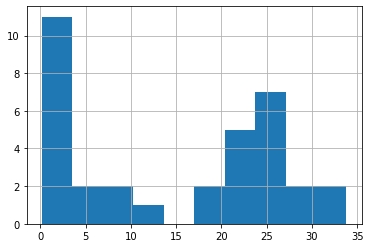

In [ ]:
fwd_df = slim_elements_df.loc[slim_elements_df.position == 'Forward']
mid_df = slim_elements_df.loc[slim_elements_df.position == 'Midfielder']
def_df = slim_elements_df.loc[slim_elements_df.position == 'Defender']
gk_df = slim_elements_df.loc[slim_elements_df.position == 'Goalkeeper']

gk_df.value.hist()

In [ ]:
gk_df.sort_values('value', ascending=False).head(10)

,second_name,team,element_type,selected_by_percent,now_cost,minutes,transfers_in,value_season,total_points,position,value
32,Martínez,Aston Villa,1,38.7,55,3420,0,33.8,186,Goalkeeper,33.8
240,Meslier,Leeds,1,4.9,50,3150,0,30.8,154,Goalkeeper,30.8
155,Guaita,Crystal Palace,1,5.9,45,3330,0,27.6,124,Goalkeeper,27.6
386,Lloris,Spurs,1,4.0,55,3420,0,27.1,149,Goalkeeper,27.1
281,Santana de Moraes,Man City,1,10.3,60,3240,0,26.7,160,Goalkeeper,26.7
451,Fabianski,West Ham,1,2.4,50,3150,0,26.6,133,Goalkeeper,26.6
471,dos Santos Patrício,Wolves,1,0.1,50,3330,0,26.4,132,Goalkeeper,26.4
0,Leno,Arsenal,1,2.3,50,3131,0,26.2,131,Goalkeeper,26.2
120,Pope,Burnley,1,5.1,55,2880,0,26.2,144,Goalkeeper,26.2
199,Schmeichel,Leicester,1,15.6,50,3420,0,25.6,128,Goalkeeper,25.6


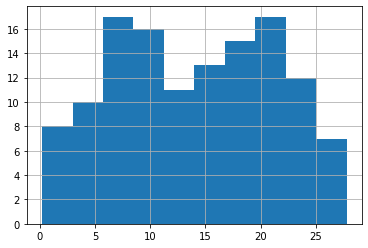

In [ ]:
def_df.value.hist()

In [ ]:
def_df.sort_values('value', ascending=False).head(10)

,second_name,team,element_type,selected_by_percent,now_cost,minutes,transfers_in,value_season,total_points,position,value
454,Cresswell,West Ham,2,19.6,55,3170,0,27.8,153,Defender,27.8
40,Targett,Aston Villa,2,9.9,50,3404,0,27.6,138,Defender,27.6
311,Wan-Bissaka,Man Utd,2,11.1,55,3060,0,26.2,144,Defender,26.2
87,Dunk,Brighton,2,7.0,50,2932,0,26.0,130,Defender,26.0
461,Coufal,West Ham,2,15.1,50,3054,0,25.6,128,Defender,25.6
39,Mings,Aston Villa,2,8.3,50,3194,0,25.6,128,Defender,25.6
183,Keane,Everton,2,3.0,50,2989,0,25.4,127,Defender,25.4
46,Konsa Ngoyo,Aston Villa,2,1.2,50,3195,0,23.8,119,Defender,23.8
286,Gato Alves Dias,Man City,2,27.6,60,2843,0,23.7,142,Defender,23.7
473,Coady,Wolves,2,8.4,45,3303,0,23.6,106,Defender,23.6


,second_name,team,element_type,selected_by_percent,now_cost,minutes,transfers_in,value_season,total_points,position,value
229,Dallas,Leeds,3,16.9,55,3410,0,31.1,171,Midfielder,31.1
241,Harrison,Leeds,3,5.4,60,2846,0,26.7,160,Midfielder,26.7
465,Soucek,West Ham,3,11.6,60,3420,0,24.5,147,Midfielder,24.5
372,Ward-Prowse,Southampton,3,4.1,65,3420,0,24.0,156,Midfielder,24.0
392,Son,Spurs,3,20.4,100,3119,0,22.8,228,Midfielder,22.8
34,Traoré,Aston Villa,3,2.0,60,2315,0,22.5,135,Midfielder,22.5
463,Bowen,West Ham,3,2.0,65,2556,0,21.7,141,Midfielder,21.7
398,Højbjerg,Spurs,3,2.9,50,3420,0,21.4,107,Midfielder,21.4
274,Gündogan,Man City,3,6.9,75,2025,0,20.9,157,Midfielder,20.9
466,Fornals,West Ham,3,0.5,60,2571,0,20.8,125,Midfielder,20.8


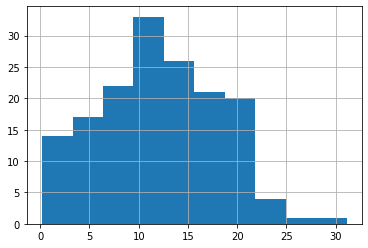

In [ ]:
mid_df.value.hist()
mid_df.sort_values('value', ascending=False).head(10)

,second_name,team,element_type,selected_by_percent,now_cost,minutes,transfers_in,value_season,total_points,position,value
230,Bamford,Leeds,4,19.6,80,3052,0,24.2,194,Forward,24.2
41,Watkins,Aston Villa,4,18.0,75,3328,0,22.4,168,Forward,22.4
191,Calvert-Lewin,Everton,4,18.1,80,2871,0,20.6,165,Forward,20.6
117,Wood,Burnley,4,3.1,70,2741,0,19.7,138,Forward,19.7
376,Adams,Southampton,4,1.9,70,2662,0,19.6,137,Forward,19.6
390,Kane,Spurs,4,22.5,125,3083,0,19.4,242,Forward,19.4
321,Wilson,Newcastle,4,6.4,75,2081,0,17.9,134,Forward,17.9
204,Vardy,Leicester,4,11.6,105,2838,0,17.8,187,Forward,17.8
194,de Andrade,Everton,4,7.5,75,2862,0,16.4,123,Forward,16.4
55,Ings,Aston Villa,4,22.7,80,2172,0,16.4,131,Forward,16.4


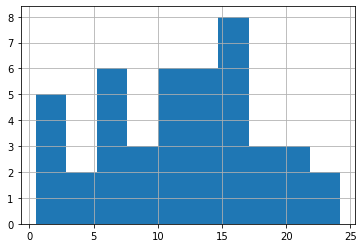

In [ ]:
fwd_df.value.hist()
fwd_df.sort_values('value', ascending=False).head(10)

In [ ]:
#slim_elements_df.to_csv('~/Desktop/fpl_data.csv') need to figure out how to export

FileNotFoundError: ignored